<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment3/Problem3_Visualize_Class_Activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 19:26:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 2607:f8b0:4001:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   122MB/s    in 0.5s    

2019-04-12 19:26:19 (122 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
#Unzipping the dataset file

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

!ls /tmp/cats_and_dogs_filtered

train  validation  vectorize.py


In [0]:
#Creating separate folders for cats and dogs - training and valdiation sets

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
#Checking contents of Directories using os.listdir

train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()

#first 10 images
print(train_cat_fnames[40:50])
#last 10 images
print(train_cat_fnames[-50:40])
print()

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])
print(train_dog_fnames[-10:])

['cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg']
[]

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['dog.990.jpg', 'dog.991.jpg', 'dog.992.jpg', 'dog.993.jpg', 'dog.994.jpg', 'dog.995.jpg', 'dog.996.jpg', 'dog.997.jpg', 'dog.998.jpg', 'dog.999.jpg']




 Showing sample images for Cats & Dogs


['/tmp/cats_and_dogs_filtered/train/cats/cat.100.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.101.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.102.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.104.jpg']
['/tmp/cats_and_dogs_filtered/train/dogs/dog.100.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.101.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.102.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.103.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.104.jpg']


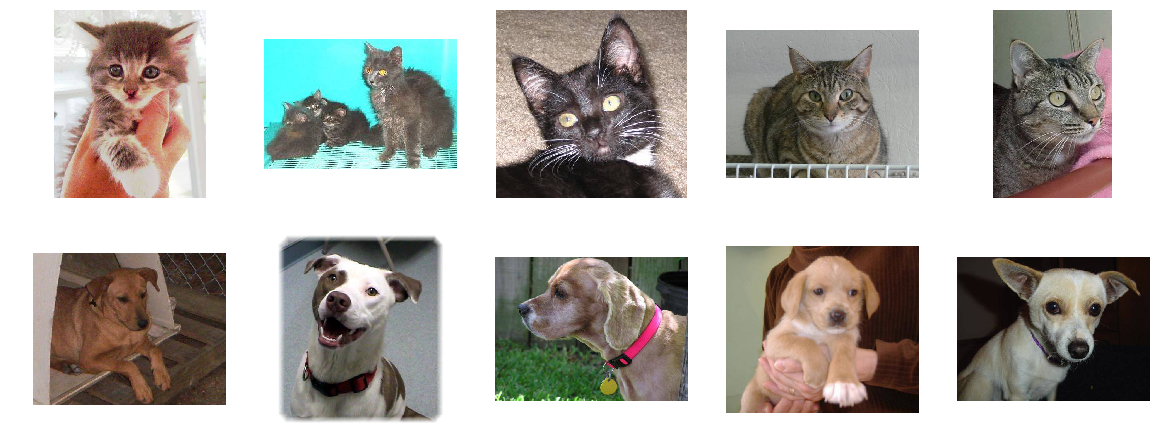

In [6]:
#Visualizing Cats and Dogs Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
print('\n\n Showing sample images for Cats & Dogs\n\n')
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-5:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-5:pic_index]]

print(next_cat_pix)
print(next_dog_pix)

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
from google.colab import files

uploaded = files.upload()

Saving cats_and_dogs_fine_tuning_functionalAPI.h5 to cats_and_dogs_fine_tuning_functionalAPI (1).h5


In [8]:
model=load_model('cats_and_dogs_fine_tuning_functionalAPI (1).h5')
model.summary()




last_conv_layer = model.get_layer('block5_conv3')

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)  

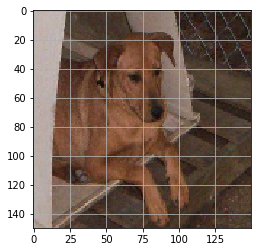

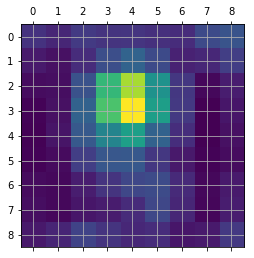

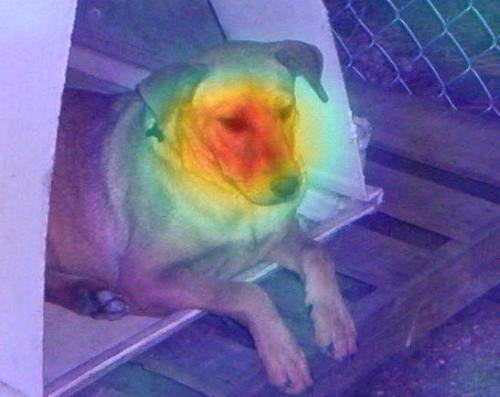

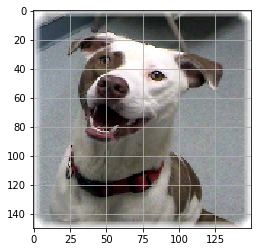

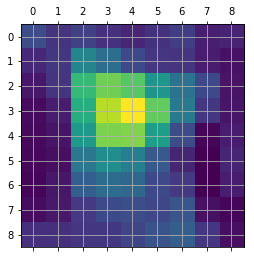

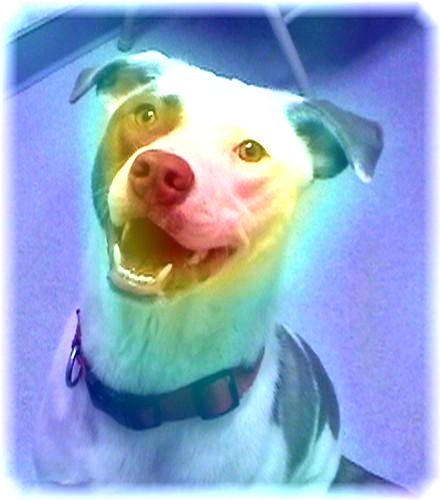

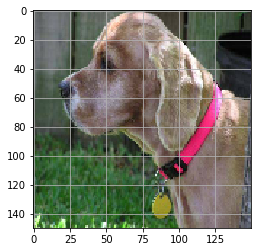

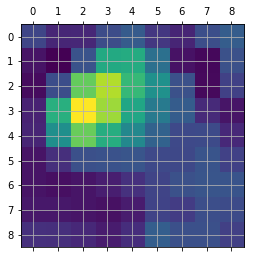

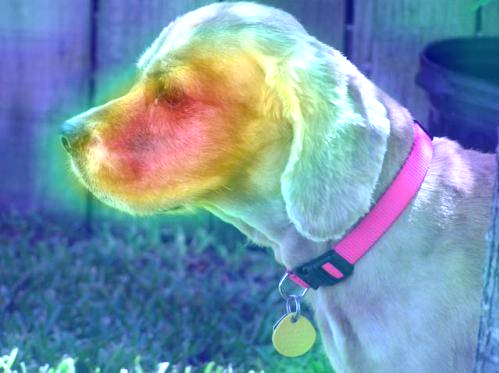

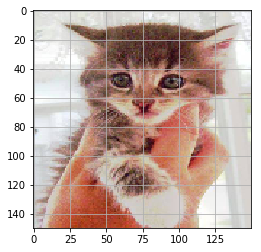

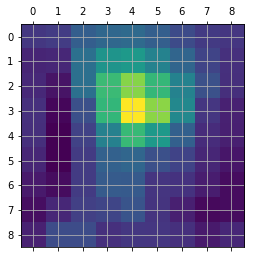

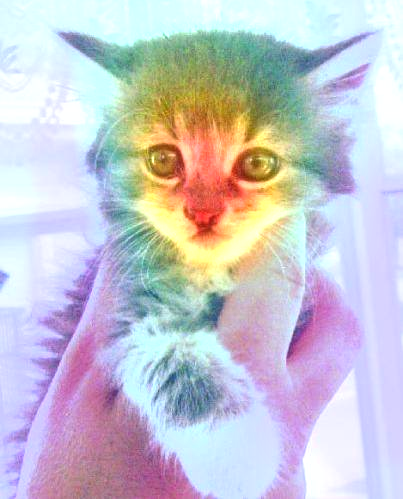

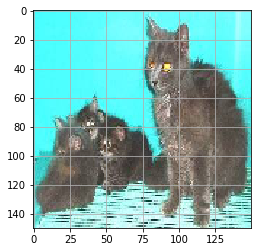

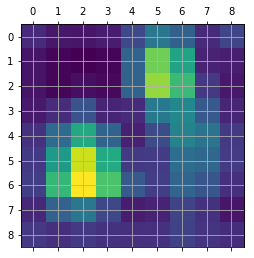

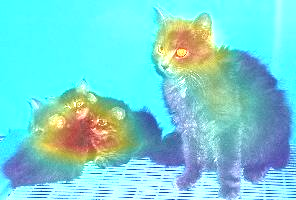

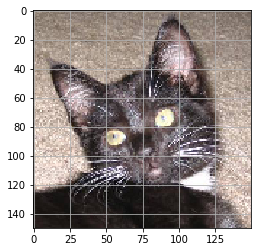

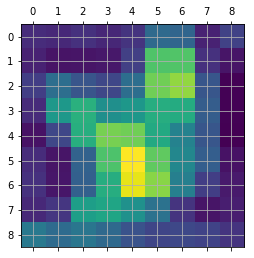

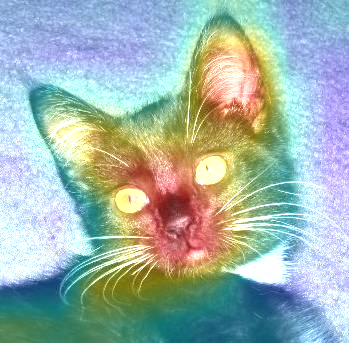

In [10]:

from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions






def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)



def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(150, 150))
  #
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  #
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  #
  preds = model.predict(x)
 
  grads = K.gradients(model.output[:, 0], last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  show_superimposed_image(img_path, heatmap)
  
  
  
  
for i in range(0,3):
  img_path=next_dog_pix[i]
  process_image(img_path)


  
for i in range(0,3):
  img_path=next_cat_pix[i]
  process_image(img_path)